# Check the Python version being used

In [1]:
!python --version

Python 3.7.6


# Check that the available gpu is being utilized

In [2]:
import tensorflow as tf

In [3]:
print("Num GPUs Available")
print(len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available
1


# Read in clustering dataset, note that this one is still missing the aggregated weather data, but this can easily be added in later

In [4]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

In [5]:
df

,Bridge_ID,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,...,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21
0,2.12E+13,"[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]",...,"[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]"
1,CALHAN-8TH ST.,"[36.0, 97.0, 428, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.3, 97.0, 955, 1949, 2, 11.0, 7.0]","[36.3, 96.9, 955, 1949, 2, 11.0, 7.3]","[36.3, 96.9, 983, 1949, 2, 11.0, 7.3]","[36.3, 96.9, 983, 1949, 2, 11.0, 7.3]",...,"[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 9.7, 7.3]","[36.3, 97.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 522, 1949, 2, 9.7, 7.3]"
2,CSG-C.80-07.65,"[36.0, 83.9, 417, 1970, 2, 6.6, 6.4]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.3, 76.0, 351, 1970, 2, 6.6, 3.0]","[36.3, 69.0, 351, 1970, 2, 6.6, 3.0]","[36.3, 66.9, 478, 1970, 2, 6.6, 2.9]","[36.3, 66.9, 478, 1970, 2, 6.6, 2.9]",...,"[36.3, 62.9, 478, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 717, 1970, 2, 6.6, 2.9]"
3,CSG-D.04-10.42,"[36.0, 82.0, 1836, 1955, 2, 7.6, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 3.4]","[36.3, 83.4, 1459, 1955, 2, 7.7, 3.0]","[36.3, 84.3, 1459, 1955, 2, 7.7, 3.4]","[36.3, 84.4, 1295, 1955, 2, 7.7, 3.4]","[36.3, 84.4, 1295, 1955, 2, 7.7, 3.4]",...,"[36.3, 72.3, 1295, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 2696, 1955, 2, 7.7, 3.4]"
4,CSG-D.37-15.67,"[36.0, 97.0, 87, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 397, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 397, 1984, 2, 12.8, 3.0]",...,"[36.3, 98.0, 397, 1984, 2, 13.3, 3.0]","[36.3, 98.0, 287, 1984, 2, 13.3, 3.0]","[36.3, 98.0, 287, 1984, 2, 13.3, 3.0]","[36.3, 99.0, 287, 1984, 2, 12.8, 3.0]","[36.3, 99.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 268, 1984, 2, 12.8, 3.0]"
...

# For the first row of the dataset, plot the sufficiency rating over time

In [6]:
first_row = df.iloc[1]

In [7]:
first_row = first_row.iloc[1:]

In [8]:
first_row

time_0     [36.0, 97.0, 428, 1949, 2, 10.9, 7.3]
time_1     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_2     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_3     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_4     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_5     [36.3, 97.0, 955, 1949, 2, 11.0, 7.0]
time_6     [36.3, 96.9, 955, 1949, 2, 11.0, 7.3]
time_7     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_8     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_9     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_10    [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_11    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_12    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_13    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_14    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_15     [36.3, 97.0, 422, 1949, 2, 9.7, 7.3]
time_16     [36.3, 97.0, 369, 1949, 2, 9.7, 7.3]
time_17     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_18     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_19     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_20     [36.3, 8

In [9]:
import re

non_decimal = re.compile(r'[^\d.]+')

list_of_row_components = []

for i, row in first_row.iteritems():
    current_row_components = row.split(', ')
    current_row_components_replaced = []
    
#     print(current_row_components)
    for idx, component in enumerate(current_row_components):
    #     print(first_row_components[idx])
        result = non_decimal.sub('', current_row_components[idx])
        current_row_components_replaced.append(float(result))
        
#     print(current_row_components_replaced)
    list_of_row_components.append(current_row_components_replaced)

In [10]:
first_row = df.iloc[1]

In [11]:
list_of_row_components

[[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0],
 [36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7

In [12]:
first_row = first_row.iloc[1:]

In [13]:
sufficiency_rating_list = []

for row_component in list_of_row_components:
    sufficiency_rating_list.append(row_component[1])

In [14]:
sufficiency_rating_list

[97.0,
 96.9,
 96.9,
 96.9,
 96.9,
 97.0,
 96.9,
 96.9,
 96.9,
 96.9,
 96.9,
 97.0,
 97.0,
 97.0,
 97.0,
 97.0,
 97.0,
 86.0,
 86.0,
 86.0,
 86.0,
 86.0]

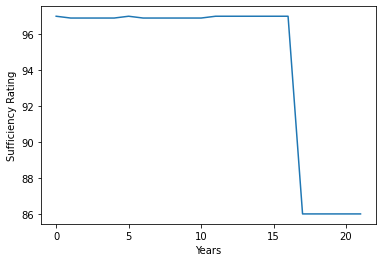

In [15]:
import matplotlib.pyplot as plt

plt.plot(sufficiency_rating_list)
plt.ylabel('Sufficiency Rating')
plt.xlabel('Years')
plt.show()


# Example of first training example

In [16]:
import pandas as pd

var1 = []
var2 = []
var3 = []
var4 = []
var5 = []
var6 = []
varout = []

for element in list_of_row_components:
#     print(element)
    var1.append(element[0])
    var2.append(element[2])
    var3.append(element[3])
    var4.append(element[4])
    var5.append(element[5])
    var6.append(element[6])
    varout.append(element[1])
    
dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

df_temp = pd.DataFrame(dict_temp)

In [17]:
df_temp

,var1,var2,var3,var4,var5,var6,varout
0,36.0,428.0,1949.0,2.0,10.9,7.3,97.0
1,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
2,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
3,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
4,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
5,36.3,955.0,1949.0,2.0,11.0,7.0,97.0
6,36.3,955.0,1949.0,2.0,11.0,7.3,96.9
7,36.3,983.0,1949.0,2.0,11.0,7.3,96.9
8,36.3,983.0,1949.0,2.0,11.0,7.3,96.9
9,36.3,983.0,1949.0,2.0,11.0,7.3,96.9


# Convert each rows into it's own dataframe representing an individual time series example

In [18]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []

for i in range(1, 524):
    
    list_of_row_components = []
    
    current_row = df.iloc[i]
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

    var1 = []
    var2 = []
    var3 = []
    var4 = []
    var5 = []
    var6 = []
    varout = []

    for element in list_of_row_components:

        var1.append(element[0])
        var2.append(element[2])
        var3.append(element[3])
        var4.append(element[4])
        var5.append(element[5])
        var6.append(element[6])
        varout.append(element[1])

    dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

    df_temp = pd.DataFrame(dict_temp)

    list_of_training_df.append(df_temp)

In [19]:
len(list_of_training_df)

523

In [20]:
list_of_training_df[7]

,var1,var2,var3,var4,var5,var6,varout
0,36.0,660.0,1970.0,2.0,11.2,2.4,96.9
1,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
2,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
3,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
4,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
5,36.3,950.0,1970.0,2.0,11.1,2.0,97.0
6,36.3,950.0,1970.0,2.0,11.1,2.4,96.9
7,36.3,700.0,1970.0,2.0,11.1,2.0,96.9
8,36.3,700.0,1970.0,2.0,11.1,2.0,96.9
9,36.3,700.0,1970.0,2.0,11.1,2.6,85.9


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

list_of_scaled_training_df = []
encoder = LabelEncoder()

scaler = MinMaxScaler(feature_range=(0, 1))

for training_df in list_of_training_df:
    temp_df = scaler.fit_transform(training_df)
    list_of_scaled_training_df.append(temp_df)

In [22]:
list_of_scaled_training_df[500]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0. 

# Single example of a time series example for a single bridge

In [23]:
values = list_of_training_df[7].values

In [24]:
n_train_hours = 21
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(21, 1, 6) (21,) (1, 1, 6) (1,)


# Confirm gpu is being used before training

In [25]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [26]:
get_available_gpus()

['/device:GPU:0']

# Build LSTM model

In [68]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(30, return_sequences=True),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='relu'),
#     Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [69]:
lstm_model.compile(loss='mae', optimizer='adam')

# Because we have individual time series for each bridge, we define an epoch number and for each epoch we train the model an a random bridge time series

# At the end, we plot the loss and validation loss over time

# This experiment is run with min max scaling

EPOCH: 1 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 1s - loss: 0.5135 - val_loss: 0.9901
EPOCH: 2 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.7372 - val_loss: 0.9767
EPOCH: 3 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4146 - val_loss: 0.5072
EPOCH: 4 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0354 - val_loss: 0.0380
EPOCH: 5 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.6375 - val_loss: 0.0446
EPOCH: 6 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.7675 - val_loss: 0.9488
EPOCH: 7 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5009 - val_loss: 0.9395
EPOCH: 8 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5242 - val_loss: 0.5414
EPOCH: 9 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0680 - val_loss: 0.0727
EPOCH: 10 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0738 - val_loss: 0.0745
EPOCH: 11 OUT OF 1000
(21, 1, 6) (21,) 

EPOCH: 86 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4043 - val_loss: 0.0803
EPOCH: 87 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2812 - val_loss: 0.1750
EPOCH: 88 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3475 - val_loss: 0.5435
EPOCH: 89 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2884 - val_loss: 0.4532
EPOCH: 90 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3117 - val_loss: 0.3601
EPOCH: 91 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2924 - val_loss: 0.5714
EPOCH: 92 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4574 - val_loss: 0.4637
EPOCH: 93 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5661 - val_loss: 0.5294
EPOCH: 94 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3412 - val_loss: 0.2811
EPOCH: 95 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3973 - val_loss: 0.3715
EPOCH: 96 OUT OF 1000
(21, 1, 

EPOCH: 170 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2634 - val_loss: 0.2989
EPOCH: 171 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0923 - val_loss: 0.0824
EPOCH: 172 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3472 - val_loss: 0.5164
EPOCH: 173 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2843 - val_loss: 0.2517
EPOCH: 174 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3118 - val_loss: 0.5085
EPOCH: 175 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3098 - val_loss: 0.2032
EPOCH: 176 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3543 - val_loss: 0.0672
EPOCH: 177 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3642 - val_loss: 0.0101
EPOCH: 178 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.6011 - val_loss: 0.3916
EPOCH: 179 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4890 - val_loss: 0.3260
EPOCH: 180 OUT OF 10

EPOCH: 254 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5974 - val_loss: 0.3200
EPOCH: 255 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2717 - val_loss: 0.1468
EPOCH: 256 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3372 - val_loss: 0.5378
EPOCH: 257 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3477 - val_loss: 0.1917
EPOCH: 258 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4375 - val_loss: 0.5641
EPOCH: 259 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1452 - val_loss: 0.1233
EPOCH: 260 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.6599 - val_loss: 0.7171
EPOCH: 261 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5176 - val_loss: 0.9755
EPOCH: 262 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4821 - val_loss: 0.8300
EPOCH: 263 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4687 - val_loss: 0.5122
EPOCH: 264 OUT OF 10

EPOCH: 338 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4122 - val_loss: 0.1940
EPOCH: 339 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.6258 - val_loss: 0.7198
EPOCH: 340 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0408 - val_loss: 0.0299
EPOCH: 341 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2675 - val_loss: 0.1099
EPOCH: 342 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.6890 - val_loss: 0.8684
EPOCH: 343 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0511 - val_loss: 0.1188
EPOCH: 344 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.8527 - val_loss: 0.9666
EPOCH: 345 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0603 - val_loss: 0.0297
EPOCH: 346 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2735 - val_loss: 0.5764
EPOCH: 347 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.7626 - val_loss: 0.1607
EPOCH: 348 OUT OF 10

EPOCH: 422 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3349 - val_loss: 0.2108
EPOCH: 423 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1577 - val_loss: 0.0568
EPOCH: 424 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5095 - val_loss: 0.7100
EPOCH: 425 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0329 - val_loss: 0.0238
EPOCH: 426 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2483 - val_loss: 0.2798
EPOCH: 427 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5509 - val_loss: 0.4160
EPOCH: 428 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2282 - val_loss: 0.0787
EPOCH: 429 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3297 - val_loss: 0.3644
EPOCH: 430 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3919 - val_loss: 0.0542
EPOCH: 431 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5209 - val_loss: 0.7549
EPOCH: 432 OUT OF 10

EPOCH: 506 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5013 - val_loss: 0.5688
EPOCH: 507 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.7276 - val_loss: 0.8550
EPOCH: 508 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3577 - val_loss: 0.3192
EPOCH: 509 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1381 - val_loss: 0.0549
EPOCH: 510 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2205 - val_loss: 0.0015
EPOCH: 511 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3843 - val_loss: 0.5583
EPOCH: 512 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5055 - val_loss: 0.4220
EPOCH: 513 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3393 - val_loss: 0.1690
EPOCH: 514 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2956 - val_loss: 0.2338
EPOCH: 515 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2012 - val_loss: 0.0831
EPOCH: 516 OUT OF 10

EPOCH: 590 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3530 - val_loss: 0.3075
EPOCH: 591 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.6539 - val_loss: 0.6342
EPOCH: 592 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3556 - val_loss: 0.4336
EPOCH: 593 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4493 - val_loss: 0.2932
EPOCH: 594 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1208 - val_loss: 0.0710
EPOCH: 595 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1516 - val_loss: 0.1875
EPOCH: 596 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4289 - val_loss: 0.4740
EPOCH: 597 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2223 - val_loss: 0.1144
EPOCH: 598 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1783 - val_loss: 0.1911
EPOCH: 599 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2966 - val_loss: 0.0262
EPOCH: 600 OUT OF 10

EPOCH: 674 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1660 - val_loss: 0.1584
EPOCH: 675 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1217 - val_loss: 0.4523
EPOCH: 676 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3771 - val_loss: 0.3010
EPOCH: 677 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5220 - val_loss: 0.4349
EPOCH: 678 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4600 - val_loss: 0.4681
EPOCH: 679 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3491 - val_loss: 0.3161
EPOCH: 680 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3929 - val_loss: 0.5228
EPOCH: 681 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3078 - val_loss: 0.0705
EPOCH: 682 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1265 - val_loss: 0.0027
EPOCH: 683 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4588 - val_loss: 0.0026
EPOCH: 684 OUT OF 10

EPOCH: 758 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.7298 - val_loss: 0.6276
EPOCH: 759 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2015 - val_loss: 0.0325
EPOCH: 760 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2560 - val_loss: 0.0228
EPOCH: 761 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3734 - val_loss: 0.2421
EPOCH: 762 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5214 - val_loss: 0.5884
EPOCH: 763 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2536 - val_loss: 0.4746
EPOCH: 764 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3462 - val_loss: 0.3377
EPOCH: 765 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3401 - val_loss: 0.3332
EPOCH: 766 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4347 - val_loss: 0.6596
EPOCH: 767 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3073 - val_loss: 0.2850
EPOCH: 768 OUT OF 10

EPOCH: 842 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5696 - val_loss: 0.3261
EPOCH: 843 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4418 - val_loss: 0.3242
EPOCH: 844 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0497 - val_loss: 0.0020
EPOCH: 845 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0496 - val_loss: 0.0018
EPOCH: 846 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3609 - val_loss: 0.1603
EPOCH: 847 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3921 - val_loss: 0.0083
EPOCH: 848 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0012 - val_loss: 7.7248e-04
EPOCH: 849 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3371 - val_loss: 0.4482
EPOCH: 850 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3745 - val_loss: 0.5877
EPOCH: 851 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.6353 - val_loss: 0.2673
EPOCH: 852 OUT O

EPOCH: 926 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4154 - val_loss: 0.4810
EPOCH: 927 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1911 - val_loss: 0.0553
EPOCH: 928 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2472 - val_loss: 0.3928
EPOCH: 929 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5165 - val_loss: 0.1351
EPOCH: 930 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0063 - val_loss: 0.0064
EPOCH: 931 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4141 - val_loss: 0.3018
EPOCH: 932 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3288 - val_loss: 0.6644
EPOCH: 933 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1344 - val_loss: 0.1409
EPOCH: 934 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3202 - val_loss: 0.1700
EPOCH: 935 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1992 - val_loss: 0.1942
EPOCH: 936 OUT OF 10

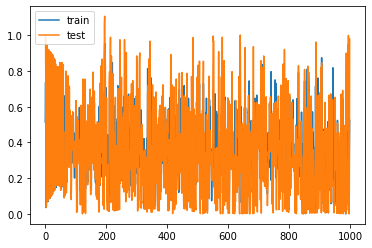

In [70]:
from matplotlib import pyplot
import random

EPOCHS = 1000

losses = []
val_losses = []

for a in range(EPOCHS):
    
    print('EPOCH: ' + str(a+1) +  ' OUT OF ' + str(EPOCHS))

    rand_int = random.randint(0, 522)

    values = list_of_scaled_training_df[rand_int]

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    # fit network
    history = lstm_model.fit(train_X, train_y, epochs=1, batch_size=21, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    for idx, h in enumerate(history.history['loss']):
        losses.append(h)
        val_losses.append(history.history['val_loss'])
        
# plot history
pyplot.plot(losses, label='train')
pyplot.plot(val_losses, label='test')
pyplot.legend()
pyplot.show()

# Based on the num_predictions we choose, we predict on that many random time series and derive a resulting root mean square error

In [71]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import math

num_predictions = 500

summation = 0

actual = []
predicted = []

for a in range(num_predictions):
    
    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#     print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    yhat = lstm_model.predict(test_X)
    
    actual.append(test_y[0])
    predicted.append(yhat[0][0][0])
    
#     print(yhat[0][0][0])
#     print(test_y[0])
    
#     difference = test_y[0] - yhat[0][0][0]
#     squared_difference = difference**2
#     summation = summation + squared_difference
    
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

In [72]:
rmse

82.72434288254566

# Because we have individual time series for each bridge, we define an epoch number and for each epoch we train the model an a random bridge time series

# At the end, we plot the loss and validation loss over time

# This experiment is run without min max scaling

EPOCH: 1 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.2932 - val_loss: 18.7950
EPOCH: 2 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.1622 - val_loss: 9.2558
EPOCH: 3 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 24.6147 - val_loss: 11.1906
EPOCH: 4 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 25.2666 - val_loss: 24.2226
EPOCH: 5 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2.1774 - val_loss: 2.4426
EPOCH: 6 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.5029 - val_loss: 17.7360
EPOCH: 7 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 18.3386 - val_loss: 19.2609
EPOCH: 8 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.6760 - val_loss: 9.6479
EPOCH: 9 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.1987 - val_loss: 9.9504
EPOCH: 10 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.4303 - val_loss: 23.9907
EPOCH: 11 OUT OF 1000
(21, 1

EPOCH: 85 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.8929 - val_loss: 6.2004
EPOCH: 86 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.7541 - val_loss: 11.5504
EPOCH: 87 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3.5020 - val_loss: 3.3284
EPOCH: 88 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.8458 - val_loss: 8.8731
EPOCH: 89 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.5901 - val_loss: 8.9159
EPOCH: 90 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.2888 - val_loss: 6.2790
EPOCH: 91 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.1817 - val_loss: 17.1908
EPOCH: 92 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.0964 - val_loss: 5.9595
EPOCH: 93 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 19.9275 - val_loss: 24.7754
EPOCH: 94 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.6916 - val_loss: 10.8332
EPOCH: 95 OUT OF 1000
(2

EPOCH: 168 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3.8299 - val_loss: 3.1602
EPOCH: 169 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5383 - val_loss: 0.5188
EPOCH: 170 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 39.7393 - val_loss: 58.4583
EPOCH: 171 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3.9087 - val_loss: 5.5682
EPOCH: 172 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 27.4193 - val_loss: 27.3482
EPOCH: 173 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2.5947 - val_loss: 2.2943
EPOCH: 174 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 15.5991 - val_loss: 21.2412
EPOCH: 175 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 32.9872 - val_loss: 31.6232
EPOCH: 176 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.4662 - val_loss: 14.5192
EPOCH: 177 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3.0790 - val_loss: 3.2838
EPOCH: 178 

1/1 - 0s - loss: 10.6658 - val_loss: 6.5234
EPOCH: 251 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.0275 - val_loss: 11.8869
EPOCH: 252 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2.3779 - val_loss: 1.9644
EPOCH: 253 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 16.3293 - val_loss: 16.4898
EPOCH: 254 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 22.5517 - val_loss: 22.3045
EPOCH: 255 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 13.3183 - val_loss: 13.2475
EPOCH: 256 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2.1346 - val_loss: 9.9355
EPOCH: 257 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 33.2903 - val_loss: 36.9898
EPOCH: 258 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 32.0663 - val_loss: 28.3442
EPOCH: 259 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.2754 - val_loss: 10.8541
EPOCH: 260 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 -

1/1 - 0s - loss: 23.1829 - val_loss: 34.5169
EPOCH: 334 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.4386 - val_loss: 9.5906
EPOCH: 335 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 51.3526 - val_loss: 51.7797
EPOCH: 336 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 16.3142 - val_loss: 16.7279
EPOCH: 337 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.6928 - val_loss: 8.0003
EPOCH: 338 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.9978 - val_loss: 10.7565
EPOCH: 339 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 44.8531 - val_loss: 46.5908
EPOCH: 340 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5.3453 - val_loss: 5.5947
EPOCH: 341 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 16.7849 - val_loss: 20.4748
EPOCH: 342 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 20.0891 - val_loss: 11.9045
EPOCH: 343 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 

EPOCH: 417 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 13.4121 - val_loss: 13.9543
EPOCH: 418 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4.3441 - val_loss: 4.1160
EPOCH: 419 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.1433 - val_loss: 22.6124
EPOCH: 420 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.2276 - val_loss: 7.4035
EPOCH: 421 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.6821 - val_loss: 4.3709
EPOCH: 422 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.3255 - val_loss: 7.2310
EPOCH: 423 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1.9959 - val_loss: 0.9617
EPOCH: 424 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6.6745 - val_loss: 8.5443
EPOCH: 425 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.5015 - val_loss: 12.1666
EPOCH: 426 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6.3047 - val_loss: 4.6223
EPOCH: 427 OUT 

EPOCH: 500 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5738 - val_loss: 0.6166
EPOCH: 501 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 15.9594 - val_loss: 17.5933
EPOCH: 502 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.1698 - val_loss: 2.2188
EPOCH: 503 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 39.8353 - val_loss: 43.5472
EPOCH: 504 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2.9621 - val_loss: 2.5063
EPOCH: 505 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.9729 - val_loss: 9.9238
EPOCH: 506 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 13.7362 - val_loss: 12.5228
EPOCH: 507 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 16.2425 - val_loss: 8.2645
EPOCH: 508 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2.4563 - val_loss: 2.6996
EPOCH: 509 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.8603 - val_loss: 5.3825
EPOCH: 510 O

EPOCH: 583 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 17.1986 - val_loss: 16.9258
EPOCH: 584 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 28.4013 - val_loss: 27.9858
EPOCH: 585 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.5588 - val_loss: 13.3764
EPOCH: 586 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2.5734 - val_loss: 2.0172
EPOCH: 587 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1.7205 - val_loss: 1.7159
EPOCH: 588 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.3528 - val_loss: 8.7760
EPOCH: 589 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6.0123 - val_loss: 5.1773
EPOCH: 590 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.5207 - val_loss: 7.6789
EPOCH: 591 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 16.3684 - val_loss: 16.2911
EPOCH: 592 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.6949 - val_loss: 13.5383
EPOCH: 593 

EPOCH: 666 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 11.6233 - val_loss: 38.2282
EPOCH: 667 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 11.9751 - val_loss: 11.5776
EPOCH: 668 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.1362 - val_loss: 7.2744
EPOCH: 669 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 18.6254 - val_loss: 19.2809
EPOCH: 670 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 13.0321 - val_loss: 12.4604
EPOCH: 671 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.6206 - val_loss: 12.7500
EPOCH: 672 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4.1257 - val_loss: 4.5387
EPOCH: 673 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.6594 - val_loss: 13.1305
EPOCH: 674 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.0785 - val_loss: 5.7291
EPOCH: 675 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4.6900 - val_loss: 4.0482
EPOCH: 

EPOCH: 749 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1.8052 - val_loss: 0.8983
EPOCH: 750 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.9799 - val_loss: 7.0358
EPOCH: 751 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4.3918 - val_loss: 0.4968
EPOCH: 752 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4.2353 - val_loss: 0.5235
EPOCH: 753 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 21.8375 - val_loss: 19.2229
EPOCH: 754 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1.9076 - val_loss: 4.7948
EPOCH: 755 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 20.0982 - val_loss: 19.0149
EPOCH: 756 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 22.4667 - val_loss: 20.8276
EPOCH: 757 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.7203 - val_loss: 12.0188
EPOCH: 758 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4.4484 - val_loss: 4.6763
EPOCH: 759 OU

EPOCH: 832 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4.0787 - val_loss: 0.8960
EPOCH: 833 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.0233 - val_loss: 10.5498
EPOCH: 834 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 11.5947 - val_loss: 12.9341
EPOCH: 835 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1.3437 - val_loss: 1.1997
EPOCH: 836 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2.7711 - val_loss: 3.9784
EPOCH: 837 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 15.1361 - val_loss: 14.7409
EPOCH: 838 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 21.2394 - val_loss: 21.1199
EPOCH: 839 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3.4277 - val_loss: 3.8280
EPOCH: 840 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2.8452 - val_loss: 2.4939
EPOCH: 841 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3.2542 - val_loss: 3.6152
EPOCH: 842 O

EPOCH: 915 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 21.4097 - val_loss: 22.6123
EPOCH: 916 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2.1103 - val_loss: 1.6530
EPOCH: 917 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.2058 - val_loss: 11.0764
EPOCH: 918 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.4174 - val_loss: 10.9738
EPOCH: 919 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.1680 - val_loss: 6.0481
EPOCH: 920 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 14.3105 - val_loss: 12.4665
EPOCH: 921 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1.8446 - val_loss: 0.7240
EPOCH: 922 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 15.0375 - val_loss: 13.2787
EPOCH: 923 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 14.9358 - val_loss: 15.1729
EPOCH: 924 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2.7266 - val_loss: 1.4910
EPOCH: 9

EPOCH: 998 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 19.3508 - val_loss: 16.3915
EPOCH: 999 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 23.7292 - val_loss: 22.4002
EPOCH: 1000 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.4002 - val_loss: 8.5074


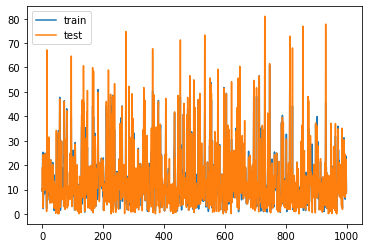

In [82]:
from matplotlib import pyplot
import random

EPOCHS = 1000

losses = []
val_losses = []

for a in range(EPOCHS):
    
    print('EPOCH: ' + str(a+1) +  ' OUT OF ' + str(EPOCHS))

    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    # fit network
    history = lstm_model.fit(train_X, train_y, epochs=1, batch_size=21, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    for idx, h in enumerate(history.history['loss']):
        losses.append(h)
        val_losses.append(history.history['val_loss'])
        
# plot history
pyplot.plot(losses, label='train')
pyplot.plot(val_losses, label='test')
pyplot.legend()
pyplot.show()

# Based on the num_predictions we choose, we predict on that many random time series and derive a resulting root mean square error

In [83]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import math

num_predictions = 500

summation = 0

actual = []
predicted = []

for a in range(num_predictions):
    
    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#     print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    yhat = lstm_model.predict(test_X)
    
    actual.append(test_y[0])
    predicted.append(yhat[0][0][0])
    
#     print(yhat[0][0][0])
#     print(test_y[0])
    
#     difference = test_y[0] - yhat[0][0][0]
#     squared_difference = difference**2
#     summation = summation + squared_difference
    
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

In [84]:
rmse

19.78412723148428